# Image Processing

This is about how to process images

## Index
- [Setup](#setup)
- [Translation and Rotation](#tran)
- [Resize](#resize)
- [Crop](#crop)
- [Masking](#mask)
- [Covert Color Space](#color)

## Setup <a id='setup'></a>
Since we are using Matplotlib function to display image in this notebook, all color are in (R,G,B) format. If displayed using OpenCV function you should convert them to (B,G,R) format.

In [8]:
import cv2
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

def display_img_mpl (img, scale=5):
    figure = plt.figure(figsize=(1.92*scale, 1.08*scale))
    ax = figure.add_subplot()
    ax.axis('off')
    ax.imshow(img)

## Translation and Rotation <a id='tran'></a>

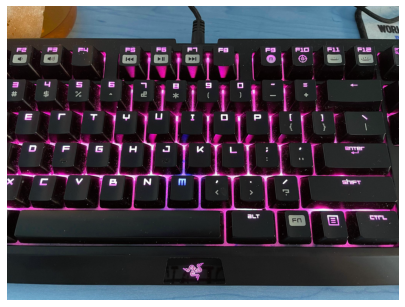

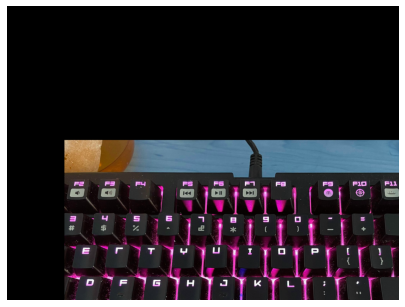

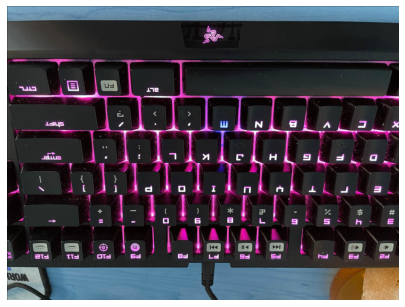

In [9]:
img = cv2.imread('imgs/keyboard.jpg')

# M is a 2x3 transformation matrix
# dst(x,y) = src(M11x+M12y+M13, M21x+M22y+M23)
def translate (img, x, y):
    M = np.array([[1, 0, x],
                  [0, 1, y]], dtype=np.float32)
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# postive angle is ccw, negative angle is cw
def rotate (img, angle, anchor=None, scale=1.0):
    h, w = img.shape[:2]

    if anchor is None:
        anchor = (w//2, h//2)
    
    M = cv2.getRotationMatrix2D(anchor, angle, scale)
    return cv2.warpAffine(img, M, (w, h))

display_img_mpl(img)
display_img_mpl(translate(img, 300, 700))
display_img_mpl(rotate(img, 180))


## Resize <a id="resize"></a>

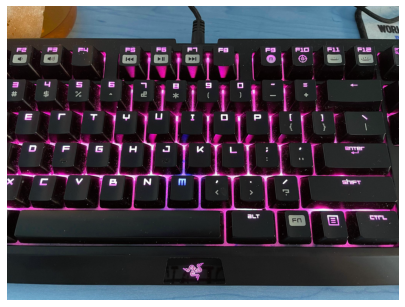

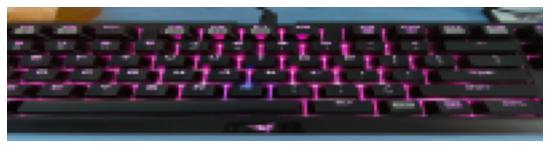

In [6]:
def resize (img, width=None, height=None, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    
    if width is None and height is None:
        return img
    
    if width is None:
        r = height / float(h)
        dim = (int(w*r), height)
    
    elif height is None:
        r = width / float(w)
        dim = (width, int(h*r))
    
    else:
        dim = (width, height)
    
    return cv2.resize(img, dim, interpolation=interpolation)

img = cv2.imread('imgs/keyboard.jpg')
resized = resize(img, 200, 50)
display_img_mpl(img)
display_img_mpl(resized)

## Flip <a id='flip'></a>

In [9]:
img = cv2.imread('imgs/keyboard.jpg')

# cv2
horizontal = cv2.flip(img, 1)
vertical = cv2.flip(img, 0)
both = cv2.flip(img, -1)

# numpy
horizontal = np.flip(img, 1)
vertical = np.flip(img, 0)
both = np.flip(img, (0, 1))

# PIL
img = Image.open('imgs/keyboard.jpg')
horizontal = ImageOps.mirror(img)
vertical = ImageOps.flip(img)

## Crop <a id="crop"></a>

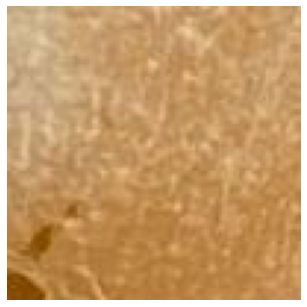

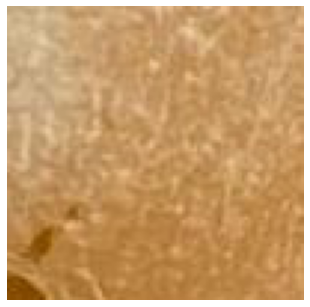

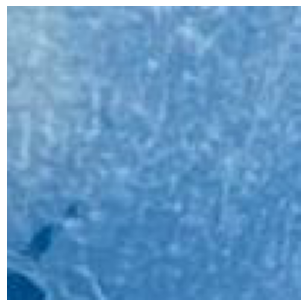

In [10]:
def crop_img_by_pixel (img, w_start, w_end, h_start, h_end):
    return img[h_start:h_end, w_start:w_end, :]


def crop_img_by_ratio (img, w_start, w_end, h_start, h_end):
    w = img.shape[1]
    h = img.shape[0]
    return img[int(h*h_start):int(h*h_end), int(w*w_start):int(w*w_end), :]


def crop_img_pil (img, w_start, w_end, h_start, h_end):
    return img.crop((w_start, h_start, w_end, h_end))


img_cv2 = cv2.imread('imgs/keyboard.jpg')
img_pil = Image.open('imgs/keyboard.jpg')

display_img_mpl(crop_img_by_pixel(img_cv2, 0, 100, 0, 100))
display_img_mpl(crop_img_by_ratio(img_cv2, 0, 0.0489, 0, 0.065))
display_img_mpl(crop_img_pil(img_pil, 0, 100, 0, 100))

## Masking <a id='mask'></a>

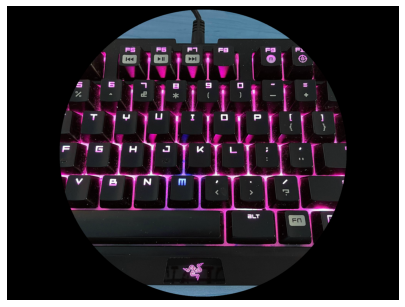

In [11]:
img = cv2.imread('imgs/keyboard.jpg')

mask = np.zeros(img.shape[:2], dtype='uint8')
cv2.circle(mask, (img.shape[1]//2, img.shape[0]//2), 750, 255, -1)

masked = cv2.bitwise_and(img, img, mask=mask)

display_img_mpl(masked)

## Covert Color Spasce <a id='color'></a>

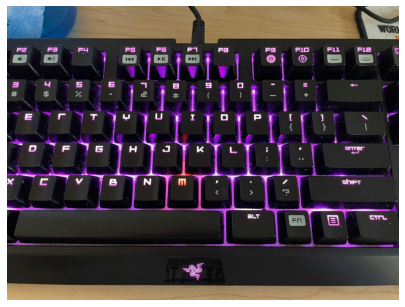

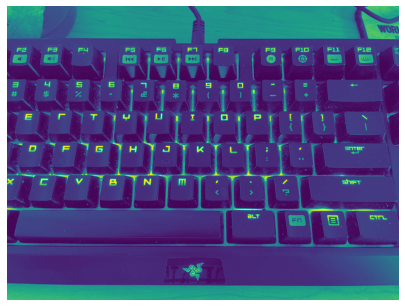

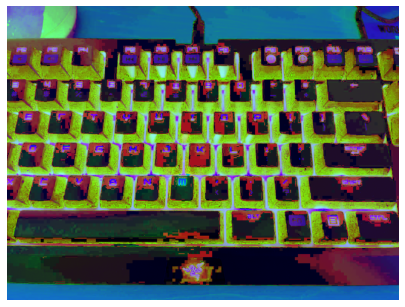

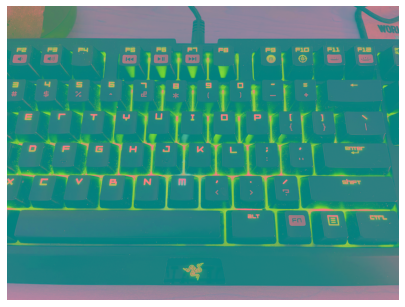

In [14]:
img = cv2.imread('imgs/keyboard.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

display_img_mpl(img)
display_img_mpl(gray)
display_img_mpl(hsv)
display_img_mpl(lab)